In [14]:
this_file_name = 'testing_new_robot_dr20.ipynb'
import sys
import os
sys.path.insert(0, os.path.abspath(
    os.path.join(os.path.dirname(this_file_name), '../../src/') ))
from utils import *
import time

In [15]:
from utils import * 

In [16]:
client_id = connect_2_sim()
test_connection(client_id)

Connected to remote API server
Number of objects in the scene:  36


In [17]:
handle_dr20 = get_object_handle(client_id,'dr20')

# How to get the bounding box corners

There is a method to get the bounding box corners. It was adress in two Coppelia's topics:
- [question by  alex270295](https://forum.coppeliarobotics.com/viewtopic.php?t=4717)
- [question by Tiriar](https://forum.coppeliarobotics.com/viewtopic.php?f=9&t=5109) 

Basically, the method `sim.simxGetObjectFloatParameter(...)` is able to retrieve several floating parameters ([this list of such parameters can be found here](https://www.coppeliarobotics.com/helpFiles/en/objectParameterIDs.htm)). The method's docs can be read right [here](https://www.coppeliarobotics.com/helpFiles/en/remoteApiFunctionsPython.htm#simxGetObjectFloatParameter).


In [18]:
left_motor_handle,right_motor_handle = get_robot_motor_handles_(client_id, './leftWheelJoint_','./rightWheelJoint_') 
# now we just need to pass the motor handler 

motor handles successfully retrieved!


In [19]:
position_vector, angle_vector = get_configuration(client_id,handle_dr20)
180*angle_vector[2]/3.14 # rad to angle

-90.0422144847311

In [20]:
min_x, min_y, min_z, max_x, max_y, max_z = get_bounding_box_corners_positions(client_id,handle_dr20)

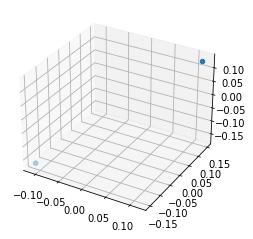

In [21]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter([min_x,max_x],[min_y,max_y],[min_z,max_z])

In [25]:

robot_run(clientID=client_id,
          left_motor_handle=left_motor_handle,
          right_motor_handle=right_motor_handle,
          left_target_velocity=-1,
          right_target_velocity=1)

for it in range(0,5):
    time.sleep(1)
    min_x, min_y, min_z, max_x, max_y, max_z = get_bounding_box_corners_positions(client_id,handle_dr20)
    print(f'MIN = {round(min_x,2), round(min_y,2), round(min_z,2)} | MAX = {round(max_x,2), round(max_y), round(max_z,2)}')

MIN = (-0.11, -0.15, -0.17) | MAX = (0.12, 0, 0.13)
MIN = (-0.11, -0.15, -0.17) | MAX = (0.12, 0, 0.13)
MIN = (-0.11, -0.15, -0.17) | MAX = (0.12, 0, 0.13)
MIN = (-0.11, -0.15, -0.17) | MAX = (0.12, 0, 0.13)
MIN = (-0.11, -0.15, -0.17) | MAX = (0.12, 0, 0.13)


In [22]:
delta_x = max_x - min_x
delta_y = max_y - min_y
print(f'Dx = {delta_x} | Dy = {delta_y}')
# notice the bounding boxes sides are different. We will use the biggest side as the square side 
# when dealing with the bounding box polygon.

Dx = 0.22546854615211487 | Dy = 0.2969276160001755
